In [1]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go

from scipy.interpolate import interp1d

# Personal python functions
import sys
sys.path.insert(1, 'C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification')

from subfunctions.make_a_properlist import *

from c_calculate_metrics.put_scalar_trialdata_into_pandas import *

df_scalarmetics_exp = put_scalar_trialdata_into_pandas()

C:\Users\jamilah\Documents\Sourceforge_analysis_PROJECTS\Motor_classification\c_calculate_metrics\put_scalar_trialdata_into_pandas.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dat = np.array(dat)
C:\Users\jamilah\Documents\Sourceforge_analysis_PROJECTS\Motor_classification\c_calculate_metrics\put_scalar_trialdata_into_pandas.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged 

## Considering sub and sup as separate categories per subject

In [121]:
exp = ['rot', 'trans']

df_SD_dis = pd.DataFrame()

for ex in exp:
    
    dfs = df_scalarmetics_exp[ex]
    
    # -------------------------------------
    
    num_of_sub = len(dfs.subject.value_counts())
    
    res_type_sub = []
    res_type_sup = []
    
    res_type_count_sub = []
    res_type_count_sup = []
    
    res1_sca_sub = []
    res2_sca_sub = []
    res3_sca_sub = []
    res4_sca_sub = []
    res5_sca_sub = []
    res6_sca_sub = []
    res7_sca_sub = []
    res8_sca_sub = []
    res9_sca_sub = []
    res10_sca_sub = []
    
    res1_sca_sup = []
    res2_sca_sup = []
    res3_sca_sup = []
    res4_sca_sup = []
    res5_sca_sup = []
    res6_sca_sup = []
    res7_sca_sup = []
    res8_sca_sup = []
    res9_sca_sup = []
    res10_sca_sup = []
    
    IC_sca_sub = []
    EC_sca_sub = []
    NC_sca_sub = []
    NR_sca_sub = []
    
    IC_sca_sup = []
    EC_sca_sup = []
    NC_sca_sup = []
    NR_sca_sup = []
    
    SDperf_rank_sub = []
    SDperf_rank_sup = []
    
    tot_conf_sub = []
    tot_conf_sup = []
    
    res_type_count_tot_sub = []
    res_type_count_tot_sup = []
    
    phys_dis_score = []
    phys_dis_b4 = []
    phys_dis_af = []
    
    for i in range(num_of_sub):
        
        # -----------------
        # Normalize the count per subject to exp total count 36
        # so each subject has the same number of counts
        # 36 = x*trial_count  ===> x = 36/trial_count = multiplicative value to normalize the count per row
        # -----------------
        
        # The res_type categories that each subject performed in the experiment
        res_type_sub.append(dfs.res_type[(dfs.subject == i) & (np.abs(dfs.ss) == 1)].value_counts().index.to_numpy())
        res_type_sup.append(dfs.res_type[(dfs.subject == i) & (np.abs(dfs.ss) == 2)].value_counts().index.to_numpy())
        
        # The res_type categories COUNT that each subject performed in the experiment
        res_type_count_sup.append(dfs.res_type[(dfs.subject == i) & (np.abs(dfs.ss) == 2)].value_counts().to_numpy())
        res_type_count_sub.append(dfs.res_type[(dfs.subject == i) & (np.abs(dfs.ss) == 1)].value_counts().to_numpy())
        
        
        
        # Total number of trials that each subject performed in the experiment
        val_sup = np.sum(dfs.res_type[(dfs.subject == i) & (np.abs(dfs.ss) == 2)].value_counts().to_numpy())
        res_type_count_tot_sup.append(val_sup)
        
        mv_sup = 18/val_sup  # multiplicative value to scale all counts to be 18
        
        val_sub = np.sum(dfs.res_type[(dfs.subject == i) & (np.abs(dfs.ss) == 1)].value_counts().to_numpy())
        res_type_count_tot_sub.append(val_sub)
        
        mv_sub = 18/val_sub  # multiplicative value to scale all counts to be 18
        
        
    
        # The subjects do not have the same number of trials, due to cutting bad trials, so counting the 
        # number of trials per subject for each SSQ subject makes the SSQ uneven.  For example, if a subject with an SSQ
        # of -4 had twice as many trials as a subject with SSQ of 1 then it would look like -4 SSQ is more present.

        # So all total subjects need to normalized such that they have the same number of trials.  
        # Then we can count up SSQ per disorientation detection group (IC, EC, NC, NR).
        res_type_list = range(1,11)
        vec_sub = []
        vec_sup = []
        for rtl in res_type_list:
            if dfs.res_type[(dfs.subject == i) & (dfs.res_type == rtl) & (np.abs(dfs.ss) == 1)].value_counts().to_numpy().any():
                res_sca_sub = dfs.res_type[(dfs.subject == i) & (dfs.res_type == rtl) & (np.abs(dfs.ss) == 1)].value_counts().to_numpy()[0] * mv_sub
            else:
                res_sca_sub = np.nan

            if dfs.res_type[(dfs.subject == i) & (dfs.res_type == rtl) & (np.abs(dfs.ss) == 2)].value_counts().to_numpy().any():
                res_sca_sup = dfs.res_type[(dfs.subject == i) & (dfs.res_type == rtl) & (np.abs(dfs.ss) == 2)].value_counts().to_numpy()[0] * mv_sup
            else:
                res_sca_sup = np.nan
                
            vec_sub.append(res_sca_sub)
            vec_sup.append(res_sca_sup)
            
        # ---------
        
        res1_sca_sub.append(vec_sub[0])
        res2_sca_sub.append(vec_sub[1])
        res3_sca_sub.append(vec_sub[2])
        res4_sca_sub.append(vec_sub[3])
        res5_sca_sub.append(vec_sub[4])
        res6_sca_sub.append(vec_sub[5])
        res7_sca_sub.append(vec_sub[6])
        res8_sca_sub.append(vec_sub[7])
        res9_sca_sub.append(vec_sub[8])
        res10_sca_sub.append(vec_sub[9])
        
        res1_sca_sup.append(vec_sup[0])
        res2_sca_sup.append(vec_sup[1])
        res3_sca_sup.append(vec_sup[2])
        res4_sca_sup.append(vec_sup[3])
        res5_sca_sup.append(vec_sup[4])
        res6_sca_sup.append(vec_sup[5])
        res7_sca_sup.append(vec_sup[6])
        res8_sca_sup.append(vec_sup[7])
        res9_sca_sup.append(vec_sup[8])
        res10_sca_sup.append(vec_sup[9])
        # ---------
            
        
        
        # -----------------
        # The most counted perception response for each subject
        # But, difficult to interpret because they are not reduced to a simple relationship with disorientation 
        # IC = 1
        # EC = 2, 4, 5
        # NC = 3, 6, 7
        # NR = 9
        # (IC) - sham (do not use) = 8
        # (NC) - sham (do not use) = 10
        # 
        # Want the count per SD category (IC, EC, NC, NR)
        # -----------------
        IC_sca_sub.append(res1_sca_sub[i])
        EC_sca_sub.append(np.nansum([res2_sca_sub[i], res4_sca_sub[i], res5_sca_sub[i]]))
        NC_sca_sub.append(np.nansum([res3_sca_sub[i], res6_sca_sub[i], res7_sca_sub[i]]))
        NR_sca_sub.append(res9_sca_sub[i])
        
        IC_sca_sup.append(res1_sca_sup[i])
        EC_sca_sup.append(np.nansum([res2_sca_sup[i], res4_sca_sup[i], res5_sca_sup[i]]))
        NC_sca_sup.append(np.nansum([res3_sca_sup[i], res6_sca_sup[i], res7_sca_sup[i]]))
        NR_sca_sup.append(res9_sca_sup[i])
        
        
        # -----------------
        # Each [] is a 4x1 vector=[nausee, oculo_moteur, disorientation, sickness]
        # SSQ [[before], [after], [diff=before-after]]
        # before - after :  I used before so stay consistant
        # -----------------
        phys_dis_score.append( dfs.SSQ_diff[(dfs.subject == i)].iloc[0][2] )
        
        phys_dis_b4.append( dfs.SSQ_b4[(dfs.subject == i)].iloc[0][2] )  # first 0th array is to get into array
        
        phys_dis_af.append( dfs.SSQ_af[(dfs.subject == i)].iloc[0][2] ) 
        
        
        # -----------------
        # Make a performance rank measure per subject, based on IC, EC, NC, and NR
        # Let IC = 2, EC=1, NC=0, NR=0
        # -----------------
        SDperf_rank_sub.append(np.nansum([2*IC_sca_sub[i], 1*EC_sca_sub[i], 0*NC_sca_sub[i], 0*NR_sca_sub[i]]))
        SDperf_rank_sup.append(np.nansum([2*IC_sca_sup[i], 1*EC_sca_sup[i], 0*NC_sca_sup[i], 0*NR_sca_sup[i]]))
        
        tot_conf_sub.append(np.nansum([res1_sca_sub[i], res2_sca_sub[i], res3_sca_sub[i], res4_sca_sub[i], res5_sca_sub[i], res6_sca_sub[i], res7_sca_sub[i], res8_sca_sub[i], res9_sca_sub[i], res10_sca_sub[i]]))
        tot_conf_sup.append(np.nansum([res1_sca_sup[i], res2_sca_sup[i], res3_sca_sup[i], res4_sca_sup[i], res5_sca_sup[i], res6_sca_sup[i], res7_sca_sup[i], res8_sca_sup[i], res9_sca_sup[i], res10_sca_sup[i]]))
    
    
    
    a0 = make_a_properlist([range(num_of_sub), range(num_of_sub)])
    
    oo = ('%s ' % (ex)) * len(a0)
    a1 = oo.split()
    
    oo_sub = 'sub ' * num_of_sub
    a2_1 = oo_sub.split()
    oo_sup = 'sup ' * num_of_sub
    a2_2 = oo_sup.split()
    a2 = make_a_properlist([a2_1, a2_2])
    
    a3 = make_a_properlist([res_type_sub, res_type_sup])
    a4 = make_a_properlist([res_type_count_sub, res_type_count_sup])
    a5 = make_a_properlist([res_type_count_tot_sub, res_type_count_tot_sup])
    
    a6 = make_a_properlist([res1_sca_sub, res1_sca_sup])
    a7 = make_a_properlist([res2_sca_sub, res2_sca_sup])
    a8 = make_a_properlist([res3_sca_sub, res3_sca_sup])
    a9 = make_a_properlist([res4_sca_sub, res4_sca_sup])
    a10 = make_a_properlist([res5_sca_sub, res5_sca_sup])
    a11 = make_a_properlist([res6_sca_sub, res6_sca_sup])
    a12 = make_a_properlist([res7_sca_sub, res7_sca_sup])
    a13 = make_a_properlist([res8_sca_sub, res8_sca_sup])
    a14 = make_a_properlist([res9_sca_sub, res9_sca_sup])
    a15 = make_a_properlist([res10_sca_sub, res10_sca_sup])
    
    a16 = make_a_properlist([IC_sca_sub, IC_sca_sup])
    a17 = make_a_properlist([EC_sca_sub, EC_sca_sup])
    a18 = make_a_properlist([NC_sca_sub, NC_sca_sup])
    a19 = make_a_properlist([NR_sca_sub, NR_sca_sup])
    
    a20 = make_a_properlist([SDperf_rank_sub, SDperf_rank_sup])
    a21 = make_a_properlist([tot_conf_sub, tot_conf_sup])
    
    a22 = make_a_properlist([phys_dis_score, phys_dis_score])
    a23 = make_a_properlist([phys_dis_b4, phys_dis_b4])
    a24 = make_a_properlist([phys_dis_af, phys_dis_af])
    
    # data = a0, a1, a2, a3, a4, a5, a6, res1_sca, res2_sca, res3_sca, res4_sca, res5_sca, res6_sca, res7_sca, res8_sca, res9_sca, res10_sca, IC_sca, EC_sca, NC_sca, NR_sca, SDperf_rank, a7, a8, a9
    # data = np.transpose(data)
    # OR
    data = np.column_stack((a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20, a21, a22, a23, a24))
    
    columns = ['subject', 'exp', 'ss', 'res_type', 'res_type_count', 'res_type_count_tot', 'res1_sca', 'res2_sca', 'res3_sca', 'res4_sca', 'res5_sca', 'res6_sca', 'res7_sca', 'res8_sca', 'res9_sca', 'res10_sca', 'IC_sca', 'EC_sca', 'NC_sca', 'NR_sca', 'SDperf_rank', 'tot_conf', 'Qdis', 'Qdisb4', 'Qdisaf']
    
    # Make columns int with astype, otherwise it is a float
    temp = pd.DataFrame(data=data, columns=columns)# .astype({'lenient': np.int64}).astype({'strict': np.int64})
    
    df_SD_dis = pd.concat([df_SD_dis, temp], axis=0)
df_SD_dis.reset_index(drop=True, inplace=True)

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)
C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\lib\shape_base.py:652: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(v)
C:\Users\jamilah\AppData\Local\Temp/ipykernel_8740/374028319.py:91: RuntimeWarning: divide by zero encountered in longlong_scalars
  mv_sub = 18/val_sub  # multiplicative value to scale all counts to be 18


In [122]:
df_SD_dis

,subject,exp,ss,res_type,res_type_count,res_type_count_tot,res1_sca,res2_sca,res3_sca,res4_sca,...,res10_sca,IC_sca,EC_sca,NC_sca,NR_sca,SDperf_rank,tot_conf,Qdis,Qdisb4,Qdisaf
0,0,rot,sub,"[1, 7, 9, 2]","[3, 2, 2, 1]",8,6.75,2.25,NaN,NaN,...,NaN,6.75,2.25,4.5,4.5,15.75,18.0,1,2,1
1,1,rot,sub,"[1, 2, 5]","[5, 3, 1]",9,10.0,6.0,NaN,NaN,...,NaN,10.0,8.0,0.0,NaN,28.0,18.0,0,1,1
2,2,rot,sub,"[1, 2]","[4, 3]",7,10.285714,7.714286,NaN,NaN,...,NaN,10.285714,7.714286,0.0,NaN,28.285714,18.0,0,0,0
3,3,rot,sub,"[7, 9, 1, 2]","[5, 2, 2, 1]",10,3.6,1.8,NaN,NaN,...,NaN,3.6,1.8,9.0,3.6,9.0,18.0,-1,1,2
4,4,rot,sub,"[1, 2, 4, 6, 7]","[3, 2, 1, 1, 1]",8,6.75,4.5,NaN,2.25,...,NaN,6.75,6.75,4.5,NaN,20.25,18.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,trans,sup,"[1, 2, 5]","[6, 4, 1]",11,9.818182,6.545455,NaN,NaN,...,NaN,9.818182,8.181818,0.0,NaN,27.818182,18.0,0,0,0
60,10,trans,sup,"[2, 1, 6, 7]","[5, 1, 1, 1]",8,2.25,11.25,NaN,NaN,...,NaN,2.25,11.25,4.5,NaN,15.75,18.0,0,0,0
61,11,trans,sup,"[2, 4, 1, 9]","[4, 2, 2, 1]",9,4.0,8.0,NaN,4.0,...,NaN,4.0,12.0,0.0,2.0,20.0,18.0,0,1,1
62,12,trans,sup,"[2, 1]","[2, 2]",4,9.0,9.0,NaN,NaN,...,NaN,9.0,9.0,0.0,NaN,27.0,18.0,-1,1,2


In [126]:
# -----------------
# Add a column that says if participants are best, average, or worst at DETECTING motion
# with respect to the population
# -----------------

print('max rank score sub :', np.max(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')]))
print('min rank score sub :', np.min(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')]))
print('mean rank score sub :', np.mean(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')]))
print('std rank score sub :', np.std(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')]))

# anything greater than 1std from the mean = best
# anything less than 1std from the mean = worst
mean_plus1std_sub = np.mean(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')]) + np.std(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')])
mean_moins1std_sub = np.mean(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')]) - np.std(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sub')])

# -----------------

print('max rank score sup :', np.max(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')]))
print('min rank score sup :', np.min(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')]))
print('mean rank score sup :', np.mean(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')]))
print('std rank score sup :', np.std(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')]))

# anything greater than 1std from the mean = best
# anything less than 1std from the mean = worst
mean_plus1std_sup = np.mean(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')]) + np.std(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')])
mean_moins1std_sup = np.mean(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')]) - np.std(df_SD_dis.SDperf_rank[(df_SD_dis.ss == 'sup')])


max rank score sub : 30.0
min rank score sub : 0.0
mean rank score sub : 17.89105113636364
std rank score sub : 7.768141477470549
max rank score sup : 29.454545454545457
min rank score sup : 9.0
mean rank score sup : 21.623050942865184
std rank score sup : 5.25933789369867


In [127]:

rank_nom = []

for i in range(len(df_SD_dis)):
    
    if df_SD_dis.ss.iloc[i] == 'sub':
        if df_SD_dis.SDperf_rank.iloc[i] > mean_plus1std_sub:
            rank_nom.append('best')
        elif df_SD_dis.SDperf_rank.iloc[i] < mean_moins1std_sub:
            rank_nom.append('worst')
        else:
            rank_nom.append('avg')
    elif df_SD_dis.ss.iloc[i] == 'sup':
        if df_SD_dis.SDperf_rank.iloc[i] > mean_plus1std_sup:
            rank_nom.append('best')
        elif df_SD_dis.SDperf_rank.iloc[i] < mean_moins1std_sup:
            rank_nom.append('worst')
        else:
            rank_nom.append('avg')
    else:
        rank_nom.append(np.nan)
        
rank_nom_s = pd.DataFrame(data=rank_nom, columns=['rank_nom'])
df_SD_dis1 = pd.concat([df_SD_dis, rank_nom_s], axis=1)
df_res = temp.rename({0: 'subject', 1: 'exp', 2: 'ss', 3: 'res_type', 4: 'res_type_count', 5: 'res_type_count_tot', 6: 'res1_sca', 7: 'res2_sca', 8: 'res3_sca', 9: 'res4_sca', 10: 'res5_sca', 11: 'res6_sca', 12: 'res7_sca', 13: 'res8_sca', 14: 'res9_sca', 15: 'res10_sca', 16: 'IC_sca', 17: 'EC_sca', 18: 'NC_sca', 19: 'NR_sca', 20: 'SDperf_rank', 21: 'tot_conf', 22: 'Qdis', 23: 'Qdisb4', 24: 'Qdisaf', 25: 'tot_conf', 26: 'rank_nom'}, axis=1)
df_SD_dis1.reset_index(drop=True, inplace=True)

In [128]:
df_SD_dis1

,subject,exp,ss,res_type,res_type_count,res_type_count_tot,res1_sca,res2_sca,res3_sca,res4_sca,...,IC_sca,EC_sca,NC_sca,NR_sca,SDperf_rank,tot_conf,Qdis,Qdisb4,Qdisaf,rank_nom
0,0,rot,sub,"[1, 7, 9, 2]","[3, 2, 2, 1]",8,6.75,2.25,NaN,NaN,...,6.75,2.25,4.5,4.5,15.75,18.0,1,2,1,avg
1,1,rot,sub,"[1, 2, 5]","[5, 3, 1]",9,10.0,6.0,NaN,NaN,...,10.0,8.0,0.0,NaN,28.0,18.0,0,1,1,best
2,2,rot,sub,"[1, 2]","[4, 3]",7,10.285714,7.714286,NaN,NaN,...,10.285714,7.714286,0.0,NaN,28.285714,18.0,0,0,0,best
3,3,rot,sub,"[7, 9, 1, 2]","[5, 2, 2, 1]",10,3.6,1.8,NaN,NaN,...,3.6,1.8,9.0,3.6,9.0,18.0,-1,1,2,worst
4,4,rot,sub,"[1, 2, 4, 6, 7]","[3, 2, 1, 1, 1]",8,6.75,4.5,NaN,2.25,...,6.75,6.75,4.5,NaN,20.25,18.0,0,0,0,avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,9,trans,sup,"[1, 2, 5]","[6, 4, 1]",11,9.818182,6.545455,NaN,NaN,...,9.818182,8.181818,0.0,NaN,27.818182,18.0,0,0,0,best
60,10,trans,sup,"[2, 1, 6, 7]","[5, 1, 1, 1]",8,2.25,11.25,NaN,NaN,...,2.25,11.25,4.5,NaN,15.75,18.0,0,0,0,worst
61,11,trans,sup,"[2, 4, 1, 9]","[4, 2, 2, 1]",9,4.0,8.0,NaN,4.0,...,4.0,12.0,0.0,2.0,20.0,18.0,0,1,1,avg
62,12,trans,sup,"[2, 1]","[2, 2]",4,9.0,9.0,NaN,NaN,...,9.0,9.0,0.0,NaN,27.0,18.0,-1,1,2,best


## What is the rank performance for each experiment per sub (18 trials) and sup (18 trials)?
This would show the sup task was 'do able' and the sub task was 'challanging'

In [129]:
df_SD_dis1.rank_nom[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.ss == 'sub')].value_counts()

avg      12
best      4
worst     2
Name: rank_nom, dtype: int64

In [130]:
df_SD_dis1.rank_nom[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.ss == 'sup')].value_counts()

avg      10
best      6
worst     2
Name: rank_nom, dtype: int64

In [147]:
df_SD_dis1.rank_nom[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.ss == 'sub')].value_counts()

avg      10
worst     3
best      1
Name: rank_nom, dtype: int64

In [146]:
df_SD_dis1.rank_nom[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.ss == 'sup')].value_counts()

avg      9
best     3
worst    2
Name: rank_nom, dtype: int64

In [155]:
rot_best_perf_sub = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.rank_nom == 'best') & (df_SD_dis1.ss == 'sub')].max()
print('rot_best_perf_sub : ', rot_best_perf_sub)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
rot_best_acc_detect_sub = np.round(rot_best_perf_sub)/36
print('rot_best_acc_detect_sub : ', rot_best_acc_detect_sub)

# --------------------

trans_best_perf_sub = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.rank_nom == 'best') & (df_SD_dis1.ss == 'sub')].max()
print('trans_best_perf_sub : ', trans_best_perf_sub)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
trans_best_acc_detect_sub = np.round(trans_best_perf_sub)/36
print('trans_best_acc_detect_sub : ', trans_best_acc_detect_sub)

# --------------------

rot_best_perf_sup = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.rank_nom == 'best') & (df_SD_dis1.ss == 'sup')].max()
print('rot_best_perf_sup : ', rot_best_perf_sup)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
rot_best_acc_detect_sup = np.round(rot_best_perf_sup)/36
print('rot_best_acc_detect_sup : ', rot_best_acc_detect_sup)

# --------------------

trans_best_perf_sup = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.rank_nom == 'best') & (df_SD_dis1.ss == 'sup')].max()
print('trans_best_perf_sup : ', trans_best_perf_sup)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
trans_best_acc_detect_sup = np.round(trans_best_perf_sup)/36
print('trans_best_acc_detect_sup : ', trans_best_acc_detect_sup)

rot_best_perf_sub :  30.0
rot_best_acc_detect_sub :  0.8333333333333334
trans_best_perf_sub :  27.0
trans_best_acc_detect_sub :  0.75
rot_best_perf_sup :  29.454545454545457
rot_best_acc_detect_sup :  0.8055555555555556
trans_best_perf_sup :  27.81818181818182
trans_best_acc_detect_sup :  0.7777777777777778


In [159]:
rot_avg_perf_sub = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.rank_nom == 'avg') & (df_SD_dis1.ss == 'sub')].mean()
print('rot_avg_perf_sub : ', rot_avg_perf_sub)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
rot_avg_acc_detect_sub = np.round(rot_avg_perf_sub)/36
print('rot_avg_acc_detect_sub : ', rot_avg_acc_detect_sub)

# --------------------

trans_avg_perf_sub = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.rank_nom == 'avg') & (df_SD_dis1.ss == 'sub')].mean()
print('trans_avg_perf_sub : ', trans_avg_perf_sub)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
trans_avg_acc_detect_sub = np.round(trans_avg_perf_sub)/36
print('trans_avg_acc_detect_sub : ', trans_avg_acc_detect_sub)

# --------------------

rot_avg_perf_sup = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.rank_nom == 'avg') & (df_SD_dis1.ss == 'sup')].mean()
print('rot_avg_perf_sup : ', rot_avg_perf_sup)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
rot_avg_acc_detect_sup = np.round(rot_avg_perf_sup)/36
print('rot_avg_acc_detect_sup : ', rot_avg_acc_detect_sup)

# --------------------

trans_avg_perf_sup = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.rank_nom == 'avg') & (df_SD_dis1.ss == 'sup')].mean()
print('trans_avg_perf_sup : ', trans_avg_perf_sup)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
trans_avg_acc_detect_sup = np.round(trans_avg_perf_sup)/36
print('trans_avg_acc_detect_sup : ', trans_avg_acc_detect_sup)

rot_avg_perf_sub :  17.224512987012986
rot_avg_acc_detect_sub :  0.4722222222222222
trans_avg_perf_sub :  20.423376623376623
trans_avg_acc_detect_sub :  0.5555555555555556
rot_avg_perf_sup :  20.424105306458248
rot_avg_acc_detect_sup :  0.5555555555555556
trans_avg_perf_sup :  20.876068376068375
trans_avg_acc_detect_sup :  0.5833333333333334


In [158]:
rot_worst_perf_sub = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.rank_nom == 'worst') & (df_SD_dis1.ss == 'sub')].min()
print('rot_worst_perf_sub : ', rot_worst_perf_sub)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
rot_worst_acc_detect_sub = np.round(rot_worst_perf_sub)/36
print('rot_worst_acc_detect_sub : ', rot_worst_acc_detect_sub)

# --------------------

trans_worst_perf_sub = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.rank_nom == 'worst') & (df_SD_dis1.ss == 'sub')].min()
print('trans_worst_perf_sub : ', trans_worst_perf_sub)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
trans_worst_acc_detect_sub = np.round(trans_worst_perf_sub)/36
print('trans_worst_acc_detect_sub : ', trans_worst_acc_detect_sub)

# --------------------

rot_worst_perf_sup = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'rot') & (df_SD_dis1.rank_nom == 'worst') & (df_SD_dis1.ss == 'sup')].min()
print('rot_worst_perf_sup : ', rot_worst_perf_sup)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
rot_worst_acc_detect_sup = np.round(rot_worst_perf_sup)/36
print('rot_worst_acc_detect_sup : ', rot_worst_acc_detect_sup)

# --------------------

trans_worst_perf_sup = df_SD_dis1.SDperf_rank[(df_SD_dis1.exp == 'trans') & (df_SD_dis1.rank_nom == 'worst') & (df_SD_dis1.ss == 'sup')].min()
print('trans_worst_perf_sup : ', trans_worst_perf_sup)

# The highest score that you can have is 18 sub trials*2=36, if you got all IC.
trans_worst_acc_detect_sup = np.round(trans_worst_perf_sup)/36
print('trans_worst_acc_detect_sup : ', trans_worst_acc_detect_sup)

rot_worst_perf_sub :  4.5
rot_worst_acc_detect_sub :  0.1111111111111111
trans_worst_perf_sub :  0.0
trans_worst_acc_detect_sub :  0.0
rot_worst_perf_sup :  10.8
rot_worst_acc_detect_sup :  0.3055555555555556
trans_worst_perf_sup :  9.0
trans_worst_acc_detect_sup :  0.25


## Without considering sub and sup as separate categories per subject

In [24]:
exp = ['rot', 'trans']

df_SD_dis = pd.DataFrame()

for ex in exp:
    
    dfs = df_scalarmetics_exp[ex]
    
    # -------------------------------------
    
    num_of_sub = len(dfs.subject.value_counts())

    SD_perf_len = []  # Overall SD performance per subject
    SD_perf_str = []  # Overall SD performance per subject
    res_type = []
    res_type_count = []
    res1_sca = []
    res2_sca = []
    res3_sca = []
    res4_sca = []
    res5_sca = []
    res6_sca = []
    res7_sca = []
    res8_sca = []
    res9_sca = []
    res10_sca = []
    
    IC_sca = []
    EC_sca = []
    NC_sca = []
    NR_sca = []
    SDperf_rank = []
    tot_conf = []
    
    res_type_count_tot = []
    phys_dis_score = []
    phys_dis_b4 = []
    phys_dis_af = []
    
    for i in range(num_of_sub):
        
        # -----------------
        # Label evaluation : not so informative
        # -----------------
        # lenient
        # 0 = (IC, EC)  Not disoriented
        # 1 = (NC, NR)  Disoriented
        SD_perf_len.append(dfs['lenient'][(dfs.subject == i)].value_counts().index.to_numpy()[0])

        # strict
        # 0 = (IC)  Not disoriented
        # 1 = (EC, NC, NR)  Disoriented
        SD_perf_str.append(dfs['strict'][(dfs.subject == i)].value_counts().index.to_numpy()[0])
        
        
        # -----------------
        # Normalize the count per subject to exp total count 36
        # so each subject has the same number of counts
        # 36 = x*trial_count  ===> x = 36/trial_count = multiplicative value to normalize the count per row
        # -----------------
        
        # The res_type categories that each subject performed in the experiment
        res_type.append(dfs.res_type[(dfs.subject == i)].value_counts().index.to_numpy())
        
        # The res_type categories COUNT that each subject performed in the experiment
        res_type_count.append(dfs.res_type[(dfs.subject == i)].value_counts().to_numpy())
        
        # Total number of trials that each subject performed in the experiment
        val = np.sum(dfs.res_type[(dfs.subject == i)].value_counts().to_numpy())
        res_type_count_tot.append(val)
        
        
        mv = 36/val  # multiplicative value to scale all counts to be 36
        
        
    
        # The subjects do not have the same number of trials, due to cutting bad trials, so counting the 
        # number of trials per subject for each SSQ subject makes the SSQ uneven.  For example, if a subject with an SSQ
        # of -4 had twice as many trials as a subject with SSQ of 1 then it would look like -4 SSQ is more present.

        # So all total subjects need to normalized such that they have the same number of trials.  
        # Then we can count up SSQ per disorientation detection group (IC, EC, NC, NR).
 
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 1)].value_counts().to_numpy().any():
            res1_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 1)].value_counts().to_numpy()[0] * mv)
        else:
            res1_sca.append(np.nan)
        
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 2)].value_counts().to_numpy().any():
            res2_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 2)].value_counts().to_numpy()[0] * mv)
        else:
            res2_sca.append(np.nan)
            
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 3)].value_counts().to_numpy().any():
            res3_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 3)].value_counts().to_numpy()[0] * mv)
        else:
            res3_sca.append(np.nan)
            
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 4)].value_counts().to_numpy().any():
            res4_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 4)].value_counts().to_numpy()[0] * mv)
        else:
            res4_sca.append(np.nan)
        
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 5)].value_counts().to_numpy().any():
            res5_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 5)].value_counts().to_numpy()[0] * mv)
        else:
            res5_sca.append(np.nan)
        
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 6)].value_counts().to_numpy().any():
            res6_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 6)].value_counts().to_numpy()[0] * mv)
        else:
            res6_sca.append(np.nan)
            
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 7)].value_counts().to_numpy().any():
            res7_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 7)].value_counts().to_numpy()[0] * mv)
        else:
            res7_sca.append(np.nan)
            
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 8)].value_counts().to_numpy().any():
            res8_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 8)].value_counts().to_numpy()[0] * mv)
        else:
            res8_sca.append(np.nan)
            
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 9)].value_counts().to_numpy().any():
            res9_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 9)].value_counts().to_numpy()[0] * mv)
        else:
            res9_sca.append(np.nan)
            
        if dfs.res_type[(dfs.subject == i) & (dfs.res_type == 10)].value_counts().to_numpy().any():
            res10_sca.append(dfs.res_type[(dfs.subject == i) & (dfs.res_type == 10)].value_counts().to_numpy()[0] * mv)
        else:
            res10_sca.append(np.nan)
        
        
        
        # -----------------
        # The most counted perception response for each subject
        # But, difficult to interpret because they are not reduced to a simple relationship with disorientation 
        # IC = 1
        # EC = 2, 4, 5
        # NC = 3, 6, 7
        # NR = 9
        # (IC) - sham (do not use) = 8
        # (NC) - sham (do not use) = 10
        # 
        # Want the count per SD category (IC, EC, NC, NR)
        # -----------------
        IC_sca.append(res1_sca[i])
        EC_sca.append(np.nansum([res2_sca[i], res4_sca[i], res5_sca[i]]))
        NC_sca.append(np.nansum([res3_sca[i], res6_sca[i], res7_sca[i]]))
        NR_sca.append(res9_sca[i])
        
        
        # -----------------
        # Each [] is a 4x1 vector=[nausee, oculo_moteur, disorientation, sickness]
        # SSQ [[before], [after], [diff=before-after]]
        # before - after :  I used before so stay consistant
        # -----------------
        phys_dis_score.append( dfs.SSQ_diff[(dfs.subject == i)].iloc[0][2] )
        
        phys_dis_b4.append( dfs.SSQ_b4[(dfs.subject == i)].iloc[0][2] )  # first 0th array is to get into array
        
        phys_dis_af.append( dfs.SSQ_af[(dfs.subject == i)].iloc[0][2] ) 
        
        
        # -----------------
        # Make a performance rank measure per subject, based on IC, EC, NC, and NR
        # Let IC = 2, EC=1, NC=0, NR=0
        # -----------------
        SDperf_rank.append(np.nansum([2*IC_sca[i], 1*EC_sca[i], 0*NC_sca[i], 0*NR_sca[i]]))
        
        
        tot_conf.append(np.nansum([res1_sca[i], res2_sca[i], res3_sca[i], res4_sca[i], res5_sca[i], res6_sca[i], res7_sca[i], res8_sca[i], res9_sca[i], res10_sca[i]]))
        
    
    a0 = np.ravel(range(num_of_sub))
    
    oo = ('%s ' % (ex)) * len(a0)
    a1 = oo.split()
    a2 = np.ravel(SD_perf_len)
    a3 = np.ravel(SD_perf_str)
    a4 = res_type
    a5 = res_type_count
    a6 = res_type_count_tot
    
    a7 = np.ravel(phys_dis_score)
    a8 = np.ravel(phys_dis_b4)
    a9 = np.ravel(phys_dis_af)
    
    # data = a0, a1, a2, a3, a4, a5, a6, res1_sca, res2_sca, res3_sca, res4_sca, res5_sca, res6_sca, res7_sca, res8_sca, res9_sca, res10_sca, IC_sca, EC_sca, NC_sca, NR_sca, SDperf_rank, a7, a8, a9
    # data = np.transpose(data)
    # OR
    data = np.column_stack((a0, a1, a2, a3, a4, a5, a6, res1_sca, res2_sca, res3_sca, res4_sca, res5_sca, res6_sca, res7_sca, res8_sca, res9_sca, res10_sca, IC_sca, EC_sca, NC_sca, NR_sca, SDperf_rank, a7, a8, a9, tot_conf))
    
    columns = ['subject', 'exp', 'lenient', 'strict', 'res_type', 'res_type_count', 'res_type_count_tot', 'res1_sca', 'res2_sca', 'res3_sca', 'res4_sca', 'res5_sca', 'res6_sca', 'res7_sca', 'res8_sca', 'res9_sca', 'res10_sca', 'IC_sca', 'EC_sca', 'NC_sca', 'NR_sca', 'SDperf_rank', 'Qdis', 'Qdisb4', 'Qdisaf', 'tot_conf']
    
    # Make columns int with astype, otherwise it is a float
    temp = pd.DataFrame(data=data, columns=columns).astype({'lenient': np.int64}).astype({'strict': np.int64})
    
    df_SD_dis = pd.concat([df_SD_dis, temp], axis=0)
df_SD_dis.reset_index(drop=True, inplace=True)

C:\Users\jamilah\AppData\Roaming\Python\Python39\site-packages\numpy\lib\shape_base.py:652: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(v)


In [90]:
# Original dataframe
dfs

,subject,tr,ss,ax,new3_ind_st,new3_ind_end,trnum_org,SSQ_b4,SSQ_af,SSQ_diff,FRT_em,res_type,TR,lenient,strict
0,0,0,2,2,0,309,5.0,"[2, 5, 2, 7]","[2, 4, 2, 6]","[0, 1, 0, 1]",3.616,2,2.1,0.0,1.0
1,0,1,0,2,895,960,7.0,"[2, 5, 2, 7]","[2, 4, 2, 6]","[0, 1, 0, 1]",19.796,8,0.0,NaN,NaN
2,0,2,0,1,1070,1148,8.0,"[2, 5, 2, 7]","[2, 4, 2, 6]","[0, 1, 0, 1]",4.708,10,4.316,NaN,NaN
3,0,3,-2,0,1528,1655,10.0,"[2, 5, 2, 7]","[2, 4, 2, 6]","[0, 1, 0, 1]",4.116,2,2.8,0.0,1.0
4,0,4,0,0,2109,2165,13.0,"[2, 5, 2, 7]","[2, 4, 2, 6]","[0, 1, 0, 1]",3.352,10,3.14,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,13,12,2,2,14899,15174,34.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",2.652,1,2.2,0.0,0.0
205,13,13,1,2,15900,16204,36.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",1.696,2,0.7,0.0,1.0
206,13,14,2,2,16936,17156,38.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",2.688,1,2.2,0.0,0.0
207,13,15,1,1,18936,19136,41.0,"[1, 0, 0, 1]","[1, 0, 0, 1]","[0, 0, 0, 0]",3.828,2,2.8,0.0,1.0


In [25]:
df_SD_dis

,subject,exp,lenient,strict,res_type,res_type_count,res_type_count_tot,res1_sca,res2_sca,res3_sca,...,res10_sca,IC_sca,EC_sca,NC_sca,NR_sca,SDperf_rank,Qdis,Qdisb4,Qdisaf,tot_conf
0,0,rot,0,1,"[1, 9, 2, 7]","[8, 6, 4, 2]",20,14.4,7.2,NaN,...,NaN,14.4,7.2,3.6,10.8,36.0,1,2,1,36.0
1,1,rot,0,0,"[1, 2, 9, 5]","[13, 8, 1, 1]",23,20.347826,12.521739,NaN,...,NaN,20.347826,14.086957,0.0,1.565217,54.782609,0,1,1,36.0
2,2,rot,0,0,"[1, 2, 10, 9]","[13, 9, 2, 1]",25,18.72,12.96,NaN,...,2.88,18.72,12.96,0.0,1.44,50.4,0,0,0,36.0
3,3,rot,0,1,"[1, 7, 9, 2, 10, 4]","[9, 7, 5, 3, 2, 1]",27,12.0,4.0,NaN,...,2.666667,12.0,5.333333,9.333333,6.666667,29.333333,-1,1,2,36.0
4,4,rot,0,1,"[1, 2, 7, 9, 10, 5, 4, 6]","[7, 4, 3, 2, 2, 1, 1, 1]",21,12.0,6.857143,NaN,...,3.428571,12.0,10.285714,6.857143,3.428571,34.285714,0,0,0,36.0
5,5,rot,0,1,"[2, 1, 7, 9, 10]","[8, 6, 4, 4, 2]",24,9.0,12.0,NaN,...,3.0,9.0,12.0,6.0,6.0,30.0,-2,4,6,36.0
6,6,rot,0,0,"[1, 2, 7, 10, 5]","[14, 6, 2, 2, 1]",25,20.16,8.64,NaN,...,2.88,20.16,10.08,2.88,NaN,50.4,0,0,0,36.0
7,7,rot,0,1,"[1, 2, 9, 7, 10, 5, 6]","[14, 7, 5, 2, 1, 1, 1]",31,16.258065,8.129032,NaN,...,1.16129,16.258065,9.290323,3.483871,5.806452,41.806452,0,0,0,36.0
8,8,rot,0,1,"[1, 2, 9, 7, 10, 4]","[12, 5, 4, 3, 3, 1]",28,15.428571,6.428571,NaN,...,3.857143,15.428571,7.714286,3.857143,5.142857,38.571429,4,4,0,36.0
9,9,rot,0,0,"[1, 2, 10, 9]","[13, 7, 5, 1]",26,18.0,9.692308,NaN,...,6.923077,18.0,9.692308,0.0,1.384615,45.692308,0,0,0,36.0


In [37]:
# -----------------
# Add a column that says if participants are best, average, or worst at DETECTING motion
# with respect to the population
# -----------------

print('max rank score :', np.max(df_SD_dis.SDperf_rank))
print('min rank score :', np.min(df_SD_dis.SDperf_rank))
print('mean rank score :', np.mean(df_SD_dis.SDperf_rank))
print('std rank score :', np.std(df_SD_dis.SDperf_rank))

# anything greater than 1std from the mean = best
# anything less than 1std from the mean = worst
mean_plus1std = np.mean(df_SD_dis.SDperf_rank) + np.std(df_SD_dis.SDperf_rank)
mean_moins1std = np.mean(df_SD_dis.SDperf_rank) - np.std(df_SD_dis.SDperf_rank)

rank_nom = []

for i in range(len(df_SD_dis)):
    
    if df_SD_dis.SDperf_rank.iloc[i] > mean_plus1std:
        rank_nom.append('best')
    elif df_SD_dis.SDperf_rank.iloc[i] < mean_moins1std:
        rank_nom.append('worst')
    else:
        rank_nom.append('avg')
        
rank_nom_s = pd.DataFrame(data=rank_nom, columns=['rank_nom'])
df_SD_dis1 = pd.concat([df_SD_dis, rank_nom_s], axis=1)
df_res = temp.rename({0: 'subject', 1: 'exp', 2: 'lenient', 3: 'strict', 4: 'res_type', 5: 'res_type_count', 6: 'res_type_count_tot', 7: 'res1_sca', 8: 'res2_sca', 9: 'res3_sca', 10: 'res4_sca', 11: 'res5_sca', 12: 'res6_sca', 13: 'res7_sca', 14: 'res8_sca', 15: 'res9_sca', 16: 'res10_sca', 17: 'IC_sca', 18: 'EC_sca', 19: 'NC_sca', 20: 'NR_sca', 21: 'SDperf_rank', 22: 'Qdis', 23: 'Qdisb4', 24: 'Qdisaf', 25: 'tot_conf', 26: 'rank_nom'}, axis=1)
df_SD_dis1.reset_index(drop=True, inplace=True)

max rank score : 54.78260869565218
min rank score : 11.25
mean rank score : 36.98646427161163
std rank score : 10.612369066052205


## Q : What was the rank performance for each experiment?

In [79]:
df_SD_dis1.rank_nom[(df_SD_dis1.exp == 'rot')].value_counts()

avg      11
best      5
worst     2
Name: rank_nom, dtype: int64

In [80]:
df_SD_dis1.rank_nom[(df_SD_dis1.exp == 'trans')].value_counts()

avg      11
best      2
worst     1
Name: rank_nom, dtype: int64

In [49]:
df_SD_dis1[(df_SD_dis1.rank_nom == 'best')]

# The highest score that you can have is 36*2=72, if you got all IC.

# The best person got 54.782609/72 = 76.08 % accuracy in detection
# The average person got 37/72 = 51.38 % accuracy in detection
# The worst person got 11.25/72 = 15.625 % accuracy in detection

,subject,exp,lenient,strict,res_type,res_type_count,res_type_count_tot,res1_sca,res2_sca,res3_sca,...,IC_sca,EC_sca,NC_sca,NR_sca,SDperf_rank,Qdis,Qdisb4,Qdisaf,tot_conf,rank_nom
1,1,rot,0,0,"[1, 2, 9, 5]","[13, 8, 1, 1]",23,20.347826,12.521739,NaN,...,20.347826,14.086957,0.0,1.565217,54.782609,0,1,1,36.0,best
2,2,rot,0,0,"[1, 2, 10, 9]","[13, 9, 2, 1]",25,18.72,12.96,NaN,...,18.72,12.96,0.0,1.44,50.4,0,0,0,36.0,best
6,6,rot,0,0,"[1, 2, 7, 10, 5]","[14, 6, 2, 2, 1]",25,20.16,8.64,NaN,...,20.16,10.08,2.88,NaN,50.4,0,0,0,36.0,best
13,13,rot,0,0,"[1, 2, 10]","[17, 9, 6]",32,19.125,10.125,NaN,...,19.125,10.125,0.0,NaN,48.375,0,0,0,36.0,best
14,14,rot,0,0,"[1, 2, 9, 10]","[16, 11, 3, 1]",31,18.580645,12.774194,NaN,...,18.580645,12.774194,0.0,3.483871,49.935484,1,4,3,36.0,best
27,9,trans,0,1,"[1, 2, 5, 4]","[8, 8, 1, 1]",18,16.0,16.0,NaN,...,16.0,20.0,0.0,NaN,52.0,0,0,0,36.0,best
30,12,trans,0,1,"[2, 1]","[5, 5]",10,18.0,18.0,NaN,...,18.0,18.0,0.0,NaN,54.0,-1,1,2,36.0,best


## Q : we want to know of the participants who physically felt different, what was their performance rank?

In [74]:
df_SD_dis1.rank_nom[(df_SD_dis1.Qdis != 0)].value_counts()

avg      8
best     2
worst    2
Name: rank_nom, dtype: int64

In [75]:
df_SD_dis1.rank_nom[(df_SD_dis1.Qdis == 0)].value_counts()

avg      14
best      5
worst     1
Name: rank_nom, dtype: int64

In [77]:
print('percentage of average detectors, that felt physical disorientation : ', 8/(14+8))
# about 1/3 of average detectors feel sick

print('percentage of best detectors, that felt physical disorientation : ', 2/(5+2))
# about 1/3 of best detectors feel sick

print('percentage of worst detectors, that felt physical disorientation : ', 2/(1+2))
# about 2/3 of worst detectors feel sick

percentage of average detectors, that felt physical disorientation :  0.36363636363636365
percentage of best detectors, that felt physical disorientation :  0.2857142857142857
percentage of worst detectors, that felt physical disorientation :  0.6666666666666666


# Organizing by Response Category : 

In [51]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res1_sca = np.sum(df_SD_dis.res1_sca[(df_SD_dis.res1_sca != np.nan) & (df_SD_dis.Qdis != 0)].to_numpy())
print('totsub_res1_sca : ', totsub_res1_sca)

# OR

# Across subjects
# totsub_res1_sca = len(df_SD_dis[(df_SD_dis.res1_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res1_sca : ', totsub_res1_sca)

res1_sca_neg5 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == -5)])/totsub_res1_sca
print('res1_sca_neg5 : ', res1_sca_neg5)

res1_sca_neg3 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == -3)])/totsub_res1_sca
print('res1_sca_neg3 : ', res1_sca_neg3)

res1_sca_neg2 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == -2)])/totsub_res1_sca
print('res1_sca_neg2 : ', res1_sca_neg2)

res1_sca_neg1 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == -1)])/totsub_res1_sca
print('res1_sca_neg1 : ', res1_sca_neg1)

res1_sca_pos1 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == 1)])/totsub_res1_sca
print('res1_sca_pos1 : ', res1_sca_pos1)

res1_sca_pos2 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == 2)])/totsub_res1_sca
print('res1_sca_pos2 : ', res1_sca_pos2)

res1_sca_pos4 = np.sum(df_SD_dis.res1_sca[(df_SD_dis.Qdis == 4)])/totsub_res1_sca
print('res1_sca_pos4 : ', res1_sca_pos4)

# Check that all categories sum to 1
res1_sca_check = res1_sca_neg5 + res1_sca_neg3 + res1_sca_neg2 + res1_sca_neg1 + res1_sca_pos1 + res1_sca_pos2 + res1_sca_pos4
print('res1_sca_check : ', res1_sca_check)

rsub :  20
totsub_res1_sca :  134.63478049963618
res1_sca_neg5 :  0.05347800897569299
res1_sca_neg3 :  0.08443896154056789
res1_sca_neg2 :  0.17719895831231608
res1_sca_neg1 :  0.23619453964264409
res1_sca_pos1 :  0.2449637830499486
res1_sca_pos2 :  0.08913001495948833
res1_sca_pos4 :  0.11459573351934214
res1_sca_check :  1.0000000000000002


In [52]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res2_sca = np.sum(df_SD_dis.res2_sca[(df_SD_dis.res2_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res2_sca : ', totsub_res2_sca)

# OR

# Across subjects
# totsub_res2_sca = len(df_SD_dis[(df_SD_dis.res2_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res2_sca : ', totsub_res2_sca)

res2_sca_neg5 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -5)])/totsub_res2_sca
print('res2_sca_neg5 : ', res2_sca_neg5)

res2_sca_neg3 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -3)])/totsub_res2_sca
print('res2_sca_neg3 : ', res2_sca_neg3)

res2_sca_neg2 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -2)])/totsub_res2_sca
print('res2_sca_neg2 : ', res2_sca_neg2)

res2_sca_neg1 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -1)])/totsub_res2_sca
print('res2_sca_neg1 : ', res2_sca_neg1)

res2_sca_pos1 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 1)])/totsub_res2_sca
print('res2_sca_pos1 : ', res2_sca_pos1)

res2_sca_pos2 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 2)])/totsub_res2_sca
print('res2_sca_pos2 : ', res2_sca_pos2)

res2_sca_pos4 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 4)])/totsub_res2_sca
print('res2_sca_pos4 : ', res2_sca_pos4)

# Check that all categories sum to 1
res2_sca_check = res2_sca_neg5 + res2_sca_neg3 + res2_sca_neg2 + res2_sca_neg1 + res2_sca_pos1 + res2_sca_pos2 + res2_sca_pos4
print('res2_sca_check : ', res2_sca_check)

rsub :  20
totsub_res2_sca :  128.70351685665776
res2_sca_neg5 :  0.07459003634447614
res2_sca_neg3 :  0.11777374159654128
res2_sca_neg2 :  0.31967158433346915
res2_sca_neg1 :  0.28282055447280535
res2_sca_pos1 :  0.1551953982006036
res2_sca_pos2 :  0.0
res2_sca_pos4 :  0.04994868505210456
res2_sca_check :  1.0


In [53]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res3_sca = np.sum(df_SD_dis.res3_sca[(df_SD_dis.res3_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res3_sca : ', totsub_res3_sca)

# OR

# Across subjects
# totsub_res3_sca = len(df_SD_dis[(df_SD_dis.res3_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res3_sca : ', totsub_res3_sca)

res3_sca_neg5 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -5)])/totsub_res3_sca
print('res3_sca_neg5 : ', res3_sca_neg5)

res3_sca_neg3 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -3)])/totsub_res3_sca
print('res3_sca_neg3 : ', res3_sca_neg3)

res3_sca_neg2 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -2)])/totsub_res3_sca
print('res3_sca_neg2 : ', res3_sca_neg2)

res3_sca_neg1 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -1)])/totsub_res3_sca
print('res3_sca_neg1 : ', res3_sca_neg1)

res3_sca_pos1 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == 1)])/totsub_res3_sca
print('res3_sca_pos1 : ', res3_sca_pos1)

res3_sca_pos2 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == 2)])/totsub_res3_sca
print('res3_sca_pos2 : ', res3_sca_pos2)

res3_sca_pos4 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == 4)])/totsub_res3_sca
print('res3_sca_pos4 : ', res3_sca_pos4)

# Check that all categories sum to 1
res3_sca_check = res3_sca_neg5 + res3_sca_neg3 + res3_sca_neg2 + res3_sca_neg1 + res3_sca_pos1 + res3_sca_pos2 + res3_sca_pos4
print('res3_sca_check : ', res3_sca_check)

rsub :  20
totsub_res3_sca :  0


ZeroDivisionError: division by zero

In [54]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res2_sca = np.sum(df_SD_dis.res2_sca[(df_SD_dis.res2_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res2_sca : ', totsub_res2_sca)

# OR

# Across subjects
# totsub_res2_sca = len(df_SD_dis[(df_SD_dis.res2_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res2_sca : ', totsub_res2_sca)

res2_sca_neg5 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -5)])/totsub_res2_sca
print('res2_sca_neg5 : ', res2_sca_neg5)

res2_sca_neg3 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -3)])/totsub_res2_sca
print('res2_sca_neg3 : ', res2_sca_neg3)

res2_sca_neg2 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -2)])/totsub_res2_sca
print('res2_sca_neg2 : ', res2_sca_neg2)

res2_sca_neg1 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -1)])/totsub_res2_sca
print('res2_sca_neg1 : ', res2_sca_neg1)

res2_sca_pos1 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 1)])/totsub_res2_sca
print('res2_sca_pos1 : ', res2_sca_pos1)

res2_sca_pos2 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 2)])/totsub_res2_sca
print('res2_sca_pos2 : ', res2_sca_pos2)

res2_sca_pos4 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 4)])/totsub_res2_sca
print('res2_sca_pos4 : ', res2_sca_pos4)

# Check that all categories sum to 1
res2_sca_check = res2_sca_neg5 + res2_sca_neg3 + res2_sca_neg2 + res2_sca_neg1 + res2_sca_pos1 + res2_sca_pos2 + res2_sca_pos4
print('res2_sca_check : ', res2_sca_check)

rsub :  20
totsub_res2_sca :  128.70351685665776
res2_sca_neg5 :  0.07459003634447614
res2_sca_neg3 :  0.11777374159654128
res2_sca_neg2 :  0.31967158433346915
res2_sca_neg1 :  0.28282055447280535
res2_sca_pos1 :  0.1551953982006036
res2_sca_pos2 :  0.0
res2_sca_pos4 :  0.04994868505210456
res2_sca_check :  1.0


In [55]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res5_sca = np.sum(df_SD_dis.res5_sca[(df_SD_dis.res5_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res5_sca : ', totsub_res5_sca)

# OR

# Across subjects
# totsub_res5_sca = len(df_SD_dis[(df_SD_dis.res5_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res5_sca : ', totsub_res5_sca)

res5_sca_neg5 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -5)])/totsub_res5_sca
print('res5_sca_neg5 : ', res5_sca_neg5)

res5_sca_neg3 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -3)])/totsub_res5_sca
print('res5_sca_neg3 : ', res5_sca_neg3)

res5_sca_neg2 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -2)])/totsub_res5_sca
print('res5_sca_neg2 : ', res5_sca_neg2)

res5_sca_neg1 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -1)])/totsub_res5_sca
print('res5_sca_neg1 : ', res5_sca_neg1)

res5_sca_pos1 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == 1)])/totsub_res5_sca
print('res5_sca_pos1 : ', res5_sca_pos1)

res5_sca_pos2 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == 2)])/totsub_res5_sca
print('res5_sca_pos2 : ', res5_sca_pos2)

res5_sca_pos4 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == 4)])/totsub_res5_sca
print('res5_sca_pos4 : ', res5_sca_pos4)

# Check that all categories sum to 1
res5_sca_check = res5_sca_neg5 + res5_sca_neg3 + res5_sca_neg2 + res5_sca_neg1 + res5_sca_pos1 + res5_sca_pos2 + res5_sca_pos4
print('res5_sca_check : ', res5_sca_check)

rsub :  20
totsub_res5_sca :  10.694736842105263
res5_sca_neg5 :  0.44881889763779526
res5_sca_neg3 :  0.17716535433070865
res5_sca_neg2 :  0.0
res5_sca_neg1 :  0.0
res5_sca_pos1 :  0.0
res5_sca_pos2 :  0.37401574803149606
res5_sca_pos4 :  0.0
res5_sca_check :  1.0


In [56]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res6_sca = np.sum(df_SD_dis.res6_sca[(df_SD_dis.res6_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res6_sca : ', totsub_res6_sca)

# OR

# Across subjects
# totsub_res6_sca = len(df_SD_dis[(df_SD_dis.res6_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res6_sca : ', totsub_res6_sca)

res6_sca_neg5 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -5)])/totsub_res6_sca
print('res6_sca_neg5 : ', res6_sca_neg5)

res6_sca_neg3 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -3)])/totsub_res6_sca
print('res6_sca_neg3 : ', res6_sca_neg3)

res6_sca_neg2 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -2)])/totsub_res6_sca
print('res6_sca_neg2 : ', res6_sca_neg2)

res6_sca_neg1 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -1)])/totsub_res6_sca
print('res6_sca_neg1 : ', res6_sca_neg1)

res6_sca_pos1 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == 1)])/totsub_res6_sca
print('res6_sca_pos1 : ', res6_sca_pos1)

res6_sca_pos2 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == 2)])/totsub_res6_sca
print('res6_sca_pos2 : ', res6_sca_pos2)

res6_sca_pos4 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == 4)])/totsub_res6_sca
print('res6_sca_pos4 : ', res6_sca_pos4)

# Check that all categories sum to 1
res6_sca_check = res6_sca_neg5 + res6_sca_neg3 + res6_sca_neg2 + res6_sca_neg1 + res6_sca_pos1 + res6_sca_pos2 + res6_sca_pos4
print('res6_sca_check : ', res6_sca_check)

rsub :  20
totsub_res6_sca :  3.6090225563909772
res6_sca_neg5 :  0.0
res6_sca_neg3 :  0.525
res6_sca_neg2 :  0.475
res6_sca_neg1 :  0.0
res6_sca_pos1 :  0.0
res6_sca_pos2 :  0.0
res6_sca_pos4 :  0.0
res6_sca_check :  1.0


In [57]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res7_sca = np.sum(df_SD_dis.res7_sca[(df_SD_dis.res7_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res7_sca : ', totsub_res7_sca)

# OR

# Across subjects
# totsub_res7_sca = len(df_SD_dis[(df_SD_dis.res7_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res7_sca : ', totsub_res7_sca)

res7_sca_neg5 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -5)])/totsub_res7_sca
print('res7_sca_neg5 : ', res7_sca_neg5)

res7_sca_neg3 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -3)])/totsub_res7_sca
print('res7_sca_neg3 : ', res7_sca_neg3)

res7_sca_neg2 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -2)])/totsub_res7_sca
print('res7_sca_neg2 : ', res7_sca_neg2)

res7_sca_neg1 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -1)])/totsub_res7_sca
print('res7_sca_neg1 : ', res7_sca_neg1)

res7_sca_pos1 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == 1)])/totsub_res7_sca
print('res7_sca_pos1 : ', res7_sca_pos1)

res7_sca_pos2 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == 2)])/totsub_res7_sca
print('res7_sca_pos2 : ', res7_sca_pos2)

res7_sca_pos4 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == 4)])/totsub_res7_sca
print('res7_sca_pos4 : ', res7_sca_pos4)

# Check that all categories sum to 1
res7_sca_check = res7_sca_neg5 + res7_sca_neg3 + res7_sca_neg2 + res7_sca_neg1 + res7_sca_pos1 + res7_sca_pos2 + res7_sca_pos4
print('res7_sca_check : ', res7_sca_check)

rsub :  20
totsub_res7_sca :  66.13333333333333
res7_sca_neg5 :  0.10887096774193548
res7_sca_neg3 :  0.0
res7_sca_neg2 :  0.38018433179723504
res7_sca_neg1 :  0.2772177419354839
res7_sca_pos1 :  0.05443548387096775
res7_sca_pos2 :  0.12096774193548389
res7_sca_pos4 :  0.058323732718894024
res7_sca_check :  1.0


In [58]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

# Across trials
totsub_res9_sca = np.sum(df_SD_dis.res9_sca[(df_SD_dis.res9_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
print('totsub_res9_sca : ', totsub_res9_sca)

# OR

# Across subjects
# totsub_res9_sca = len(df_SD_dis[(df_SD_dis.res9_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res9_sca : ', totsub_res9_sca)

res9_sca_neg5 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == -5)])/totsub_res9_sca
print('res9_sca_neg5 : ', res9_sca_neg5)

res9_sca_neg3 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == -3)])/totsub_res9_sca
print('res9_sca_neg3 : ', res9_sca_neg3)

res9_sca_neg2 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == -2)])/totsub_res9_sca
print('res9_sca_neg2 : ', res9_sca_neg2)

res9_sca_neg1 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == -1)])/totsub_res9_sca
print('res9_sca_neg1 : ', res9_sca_neg1)

res9_sca_pos1 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == 1)])/totsub_res9_sca
print('res9_sca_pos1 : ', res9_sca_pos1)

res9_sca_pos2 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == 2)])/totsub_res9_sca
print('res9_sca_pos2 : ', res9_sca_pos2)

res9_sca_pos4 = np.sum(df_SD_dis.res9_sca[(df_SD_dis.Qdis == 4)])/totsub_res9_sca
print('res9_sca_pos4 : ', res9_sca_pos4)

# Check that all categories sum to 1
res9_sca_check = res9_sca_neg5 + res9_sca_neg3 + res9_sca_neg2 + res9_sca_neg1 + res9_sca_pos1 + res9_sca_pos2 + res9_sca_pos4
print('res9_sca_check : ', res9_sca_check)

rsub :  20
totsub_res9_sca :  55.016703047942435
res9_sca_neg5 :  0.0
res9_sca_neg3 :  0.03443930183264815
res9_sca_neg2 :  0.20772912216517933
res9_sca_neg1 :  0.18660999474505274
res9_sca_pos1 :  0.25962789800935077
res9_sca_pos2 :  0.2181155782734383
res9_sca_pos4 :  0.0934781049743307
res9_sca_check :  1.0


# Organize by Grouped Response Category : IC, EC, NC, NR
These are the values in the table in the paper

In [59]:
# IC is same as res1 - see first cell under 'Organizing by Response Category'
IC_vec = np.multiply([res1_sca_neg5, res1_sca_neg3, res1_sca_neg2, res1_sca_neg1, res1_sca_pos1, res1_sca_pos2, res1_sca_pos4], 100)

for i in IC_vec:
    print("%.2f" % i)

5.35
8.44
17.72
23.62
24.50
8.91
11.46


In [60]:
# EC
# Make table percentage across experiments and participants

# Across trials
EC0 = np.sum(df_SD_dis.res2_sca[(df_SD_dis.res2_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
EC1 = np.sum(df_SD_dis.res4_sca[(df_SD_dis.res4_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
EC2 = np.sum(df_SD_dis.res5_sca[(df_SD_dis.res5_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
totsub_EC = EC0 + EC1 + EC2
print('totsub_EC : ', totsub_EC)

# OR

# Across subjects
# totsub_res2_sca = len(df_SD_dis[(df_SD_dis.res2_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res2_sca : ', totsub_res2_sca)

EC_neg5 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -5)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == -5)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -5)]))/totsub_EC
print('EC_neg5 : ', EC_neg5)

EC_neg3 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -3)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == -3)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -3)]))/totsub_EC
print('EC_neg3 : ', EC_neg3)

EC_neg2 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -2)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == -2)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -2)]))/totsub_EC
print('EC_neg2 : ', EC_neg2)

EC_neg1 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == -1)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == -1)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == -1)]))/totsub_EC
print('EC_neg1 : ', EC_neg1)

EC_pos1 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 1)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == 1)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == 1)]))/totsub_EC
print('EC_pos1 : ', EC_pos1)

EC_pos2 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 2)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == 2)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == 2)]))/totsub_EC
print('EC_pos2 : ', EC_pos2)

EC_pos4 = (np.sum(df_SD_dis.res2_sca[(df_SD_dis.Qdis == 4)]) + np.sum(df_SD_dis.res4_sca[(df_SD_dis.Qdis == 4)]) + np.sum(df_SD_dis.res5_sca[(df_SD_dis.Qdis == 4)]))/totsub_EC
print('EC_pos4 : ', EC_pos4)

# Check that all categories sum to 1
EC_check = EC_neg5 + EC_neg3 + EC_neg2 + EC_neg1 + EC_pos1 + EC_pos2 + EC_pos4
print('EC_check : ', EC_check)

EC_vec = np.multiply([EC_neg5, EC_neg3, EC_neg2, EC_neg1, EC_pos1, EC_pos2, EC_pos4], 100)

for i in EC_vec:
    print("%.2f" % i)

totsub_EC :  142.01730131781065
EC_neg5 :  0.10139609657681946
EC_neg3 :  0.120074324893602
EC_neg2 :  0.28970313307662704
EC_neg1 :  0.26569532714111027
EC_pos1 :  0.1406461984775238
EC_pos2 :  0.028165582382449855
EC_pos4 :  0.05431933745186757
EC_check :  1.0
10.14
12.01
28.97
26.57
14.06
2.82
5.43


In [61]:
# NC
# Make table percentage across experiments and participants

# Across trials
NC0 = np.sum(df_SD_dis.res3_sca[(df_SD_dis.res3_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
NC1 = np.sum(df_SD_dis.res6_sca[(df_SD_dis.res6_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
NC2 = np.sum(df_SD_dis.res7_sca[(df_SD_dis.res7_sca != np.nan) & (df_SD_dis.Qdis != 0)].dropna(axis=0).to_numpy())
totsub_NC = NC0 + NC1 + NC2
print('totsub_NC : ', totsub_NC)

# OR

# Across subjects
# totsub_res3_sca = len(df_SD_dis[(df_SD_dis.res3_sca != np.nan) & (df_SD_dis.Qdis != 0)])
# print('totsub_res3_sca : ', totsub_res3_sca)

NC_neg5 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -5)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -5)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -5)]))/totsub_NC
print('NC_neg5 : ', NC_neg5)

NC_neg3 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -3)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -3)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -3)]))/totsub_NC
print('NC_neg3 : ', NC_neg3)

NC_neg2 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -2)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -2)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -2)]))/totsub_NC
print('NC_neg2 : ', NC_neg2)

NC_neg1 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == -1)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == -1)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == -1)]))/totsub_NC
print('NC_neg1 : ', NC_neg1)

NC_pos1 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == 1)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == 1)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == 1)]))/totsub_NC
print('NC_pos1 : ', NC_pos1)

NC_pos2 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == 2)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == 2)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == 2)]))/totsub_NC
print('NC_pos2 : ', NC_pos2)

NC_pos4 = (np.sum(df_SD_dis.res3_sca[(df_SD_dis.Qdis == 4)]) + np.sum(df_SD_dis.res6_sca[(df_SD_dis.Qdis == 4)]) + np.sum(df_SD_dis.res7_sca[(df_SD_dis.Qdis == 4)]))/totsub_NC
print('NC_pos4 : ', NC_pos4)

# Check that all categories sum to 1
NC_check = NC_neg5 + NC_neg3 + NC_neg2 + NC_neg1 + NC_pos1 + NC_pos2 + NC_pos4
print('NC_check : ', NC_check)

NC_vec = np.multiply([NC_neg5, NC_neg3, NC_neg2, NC_neg1, NC_pos1, NC_pos2, NC_pos4], 100)

for i in NC_vec:
    print("%.2f" % i)

totsub_NC :  69.74235588972431
NC_neg5 :  0.10323712051517939
NC_neg3 :  0.02716766329346826
NC_neg2 :  0.3850908463661454
NC_neg1 :  0.26287229760809566
NC_pos1 :  0.0516185602575897
NC_pos2 :  0.11470791168353266
NC_pos4 :  0.05530560027598897
NC_check :  1.0000000000000002
10.32
2.72
38.51
26.29
5.16
11.47
5.53


In [62]:
# NR is same as res9_sca - see cell 9 under 'Organizing by Response Category'
NR_vec = np.multiply([res9_sca_neg5, res9_sca_neg3, res9_sca_neg2, res9_sca_neg1, res9_sca_pos1, res9_sca_pos2, res9_sca_pos4], 100)

val = 0
for i in NR_vec:
    val = val + i
    print("%.2f" % i)

print('NR_check : ', val)

0.00
3.44
20.77
18.66
25.96
21.81
9.35
NR_check :  100.00000000000001


length of Qdis : 7
length of IC_vec : 7
length of EC_vec : 7
length of NC_vec : 7
length of NR_vec : 7
shape of dat : (7, 5)


<AxesSubplot:xlabel='Qdis', ylabel='IC_vec'>

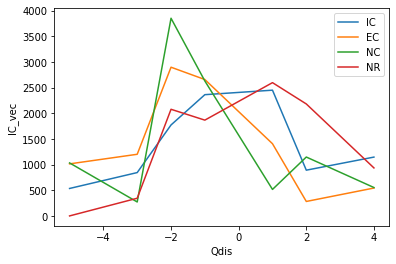

In [63]:
Qdis = make_a_properlist(df_SD_dis.Qdis[(df_SD_dis.Qdis != 0)].value_counts().sort_index().index.to_numpy())

data = Qdis, np.multiply(IC_vec,100),np.multiply(EC_vec,100), np.multiply(NC_vec,100), np.multiply(NR_vec,100)
print('length of Qdis :', len(Qdis))
print('length of IC_vec :', len(IC_vec))
print('length of EC_vec :', len(EC_vec))
print('length of NC_vec :', len(NC_vec))
print('length of NR_vec :', len(NR_vec))

data = np.transpose(data)
print('shape of dat :', data.shape)
columns = ['Qdis', 'IC_vec', 'EC_vec', 'NC_vec', 'NR_vec']

plotit = pd.DataFrame(data=data, columns=columns)

import seaborn as sns
# sns.lineplot(data=plotit)
sns.lineplot(x=plotit.Qdis, y=plotit.IC_vec, label='IC')
sns.lineplot(x=plotit.Qdis, y=plotit.EC_vec, label='EC')
sns.lineplot(x=plotit.Qdis, y=plotit.NC_vec, label='NC')
sns.lineplot(x=plotit.Qdis, y=plotit.NR_vec, label='NR')


<AxesSubplot:>

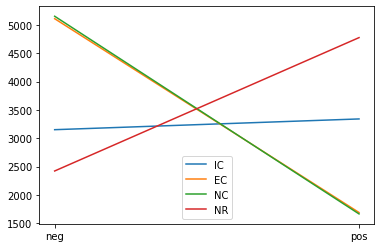

In [64]:
# Condense plot even more : a single sum for positive and a single sum for negative 
Qdis = ['neg', 'pos']

IC_pn = [np.sum(np.multiply(IC_vec[0:3],100)), np.sum(np.multiply(IC_vec[4:6],100))]
EC_pn = [np.sum(np.multiply(EC_vec[0:3],100)), np.sum(np.multiply(EC_vec[4:6],100))]
NC_pn = [np.sum(np.multiply(NC_vec[0:3],100)), np.sum(np.multiply(NC_vec[4:6],100))]
NR_pn = [np.sum(np.multiply(NR_vec[0:3],100)), np.sum(np.multiply(NR_vec[4:6],100))]

import seaborn as sns
sns.lineplot(x=Qdis, y=IC_pn, label='IC')
sns.lineplot(x=Qdis, y=EC_pn, label='EC')
sns.lineplot(x=Qdis, y=NC_pn, label='NC')
sns.lineplot(x=Qdis, y=NR_pn, label='NR')



In [88]:
Qdis = ['neg', 'pos']

val = [IC_vec, EC_vec, NC_vec, NR_vec]

n1 = 'IC ' * 4
n2 = 'EC ' * 4
n3 = 'NC ' * 4
n4 = 'NR ' * 4
p1 = 'IC ' * 3
p2 = 'EC ' * 3
p3 = 'NC ' * 3
p4 = 'NR ' * 3
motcat = [n1.split(), p1.split(), n2.split(), p2.split(), n3.split(), p3.split(), n4.split(), p4.split()]


n = 'neg ' * 4
p = 'pos ' * 3
motsign = [n.split(), p.split(), n.split(), p.split(), n.split(), p.split(), n.split(), p.split()]

a0 = pd.Series(make_a_properlist(motcat))
a1 = pd.Series(make_a_properlist(motsign))
a2 = pd.Series(np.ravel(val))

temp = pd.concat([a0, a1, a2], axis=1)
df0 = temp.rename({0: 'Category', 1: 'motsign', 2: 'val'}, axis=1)
df0

,Category,motsign,val
0,IC,neg,5.347801
1,IC,neg,8.443896
2,IC,neg,17.719896
3,IC,neg,23.619454
4,IC,pos,24.496378
5,IC,pos,8.913001
6,IC,pos,11.459573
7,EC,neg,10.139610
8,EC,neg,12.007432
9,EC,neg,28.970313


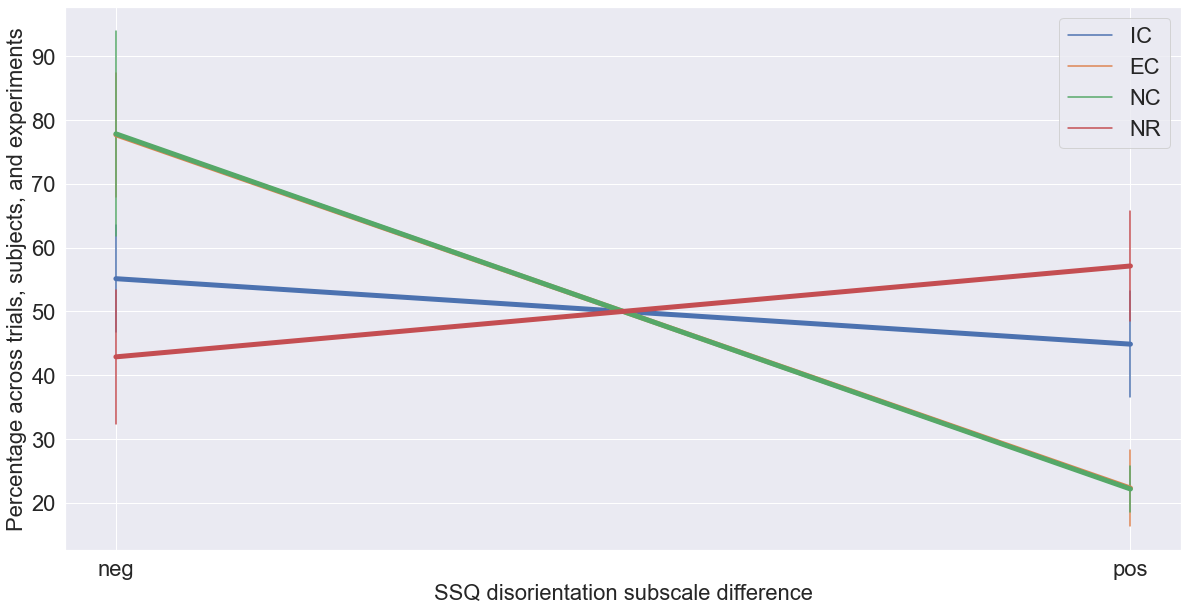

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.set(font_scale = 2)
sns.color_palette()
sns.lineplot(data=df0, x="motsign", y="val", hue="Category", err_style="bars",  estimator=np.sum, ci="sd", linewidth=5)
ax.set_ylabel('Percentage across trials, subjects, and experiments', fontsize=22)
ax.set_xlabel('SSQ disorientation subscale difference', fontsize=22)

plt.legend(loc='upper right')

plt.savefig('C:\\Users\\jamilah\\Documents\\Github_analysis_PROJECTS\\Motor_classification\\f_SSQ_correlation\\physicalDis_perfDis.png')

In [67]:
# Comparing within performance category condition

from subfunctions.two_sample_stats import *
num_of_tests = 2

# Verify that negIC has a significantly different mean than posIC
v0 = df0.val[(df0.Category == 'IC') & (df0.motsign == 'neg')].to_numpy()
print('v0 : ', v0)
v1 = df0.val[(df0.Category == 'IC') & (df0.motsign == 'pos')].to_numpy()
print('v1 : ', v1)
df_res = two_sample_stats(v0, v1, num_of_tests)


v0 = df0.val[(df0.Category == 'EC') & (df0.motsign == 'neg')].to_numpy()
print('v0 : ', v0)
v1 = df0.val[(df0.Category == 'EC') & (df0.motsign == 'pos')].to_numpy()
print('v1 : ', v1)
temp = two_sample_stats(v0, v1, num_of_tests)
df_res = pd.concat([df_res, temp], axis=0)

v0 = df0.val[(df0.Category == 'NC') & (df0.motsign == 'neg')].to_numpy()
print('v0 : ', v0)
v1 = df0.val[(df0.Category == 'NC') & (df0.motsign == 'pos')].to_numpy()
print('v1 : ', v1)
temp = two_sample_stats(v0, v1, num_of_tests)
df_res = pd.concat([df_res, temp], axis=0)

v0 = df0.val[(df0.Category == 'NR') & (df0.motsign == 'neg')].to_numpy()
print('v0 : ', v0)
v1 = df0.val[(df0.Category == 'NR') & (df0.motsign == 'pos')].to_numpy()
print('v1 : ', v1)
temp = two_sample_stats(v0, v1, num_of_tests)
df_res = pd.concat([df_res, temp], axis=0)

v0 :  [ 534.78008976  844.38961541 1771.98958312 2361.94539643]
v1 :  [2449.6378305   891.30014959 1145.95733519]
v0 :  [1013.96096577 1200.74324894 2897.03133077 2656.95327141]
v1 :  [1406.46198478  281.65582382  543.19337452]
v0 :  [1032.37120515  271.67663293 3850.90846366 2628.72297608]
v1 :  [ 516.18560258 1147.07911684  553.05600276]
v0 :  [   0.          344.39301833 2077.29122165 1866.09994745]
v1 :  [2596.27898009 2181.15578273  934.78104974]


In [68]:
df_res

,norm_result,test1,pval_1,test2,pval_2
0,nonnormal,signedrank,1.000,sumrank,0.563703
0,nonnormal,signedrank,0.250,sumrank,0.083265
0,nonnormal,signedrank,0.375,sumrank,0.248213
0,nonnormal,signedrank,0.625,sumrank,0.248213


In [69]:
# Comparing across performance category condition

v0 = df0.val[(df0.Category == 'IC') & (df0.motsign == 'neg')].to_numpy()
print('v0 : ', v0)
v1 = df0.val[(df0.Category == 'EC') & (df0.motsign == 'neg')].to_numpy()
print('v1 : ', v1)
df_res = two_sample_stats(v0, v1, num_of_tests)



v0 = df0.val[(df0.Category == 'IC') & (df0.motsign == 'neg')].to_numpy()
print('v0 : ', v0)
v1 = df0.val[(df0.Category == 'NC') & (df0.motsign == 'neg')].to_numpy()
print('v1 : ', v1)
temp = two_sample_stats(v0, v1, num_of_tests)
df_res = pd.concat([df_res, temp], axis=0)

v0 :  [ 534.78008976  844.38961541 1771.98958312 2361.94539643]
v1 :  [1013.96096577 1200.74324894 2897.03133077 2656.95327141]
v0 :  [ 534.78008976  844.38961541 1771.98958312 2361.94539643]
v1 :  [1032.37120515  271.67663293 3850.90846366 2628.72297608]


In [70]:
df_res

,norm_result,test1,pval_1,test2,pval_2
0,nonnormal,signedrank,0.125,sumrank,0.248213
0,nonnormal,signedrank,0.625,sumrank,0.563703


# Organizing by SD_label: Lenient

In [ ]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

totsub_nds = len(df_SD_dis[(df_SD_dis.lenient == 0) & (df_SD_dis.Qdis != 0)])
print('totsub_nds : ', totsub_nds)

totsub_ds = len(df_SD_dis[(df_SD_dis.lenient == 1) & (df_SD_dis.Qdis != 0)])
print('totsub_ds : ', totsub_ds)

len_nds_neg5 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -5) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_neg5 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -5) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_neg5 : ', len_nds_neg5)
print('len_ds_neg5 : ', len_ds_neg5)

len_nds_neg3 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -3) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_neg3 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -3) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_neg3 : ', len_nds_neg3)
print('len_ds_neg3 : ', len_ds_neg3)

len_nds_neg2 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -2) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_neg2 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -2) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_neg2 : ', len_nds_neg2)
print('len_ds_neg2 : ', len_ds_neg2)

len_nds_neg1 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -1) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_neg1 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == -1) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_neg1 : ', len_nds_neg1)
print('len_ds_neg1 : ', len_ds_neg1)

len_nds_pos1 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == 1) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_pos1 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == 1) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_pos1 : ', len_nds_pos1)
print('len_ds_pos1 : ', len_ds_pos1)

len_nds_pos2 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == 2) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_pos2 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == 2) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_pos2 : ', len_nds_pos2)
print('len_ds_pos2 : ', len_ds_pos2)

len_nds_pos4 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == 4) & (df_SD_dis.lenient == 0)])/totsub_nds
len_ds_pos4 = len(df_SD_dis.lenient[(df_SD_dis.Qdis == 4) & (df_SD_dis.lenient == 1)])/totsub_ds
print('len_nds_pos4 : ', len_nds_pos4)
print('len_ds_pos4 : ', len_ds_pos4)

# Check that all categories sum to 1
len_nds = len_nds_neg5 + len_nds_neg3 + len_nds_neg2 + len_nds_neg1 + len_nds_pos1 + len_nds_pos2 + len_nds_pos4
len_ds = len_ds_neg5 + len_ds_neg3 + len_ds_neg2 + len_ds_neg1 + len_ds_pos1 + len_ds_pos2 + len_ds_pos4
print('len_nds : ', len_nds)
print('len_ds : ', len_ds)

In [ ]:
# Make table percentage across experiments and participants

# Remove participants that did not report any change in disorientation
rsub = df_SD_dis.Qdis[(df_SD_dis.Qdis == 0)].value_counts().to_numpy()[0]
print('rsub : ', rsub)

totsub_nds = len(df_SD_dis[(df_SD_dis.strict == 0) & (df_SD_dis.Qdis != 0)])
print('totsub_nds : ', totsub_nds)

totsub_ds = len(df_SD_dis[(df_SD_dis.strict == 1) & (df_SD_dis.Qdis != 0)])
print('totsub_ds : ', totsub_ds)

len_nds_neg5 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -5) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_neg5 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -5) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_neg5 : ', len_nds_neg5)
print('len_ds_neg5 : ', len_ds_neg5)

len_nds_neg3 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -3) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_neg3 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -3) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_neg3 : ', len_nds_neg3)
print('len_ds_neg3 : ', len_ds_neg3)

len_nds_neg2 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -2) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_neg2 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -2) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_neg2 : ', len_nds_neg2)
print('len_ds_neg2 : ', len_ds_neg2)

len_nds_neg1 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -1) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_neg1 = len(df_SD_dis.strict[(df_SD_dis.Qdis == -1) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_neg1 : ', len_nds_neg1)
print('len_ds_neg1 : ', len_ds_neg1)

len_nds_pos1 = len(df_SD_dis.strict[(df_SD_dis.Qdis == 1) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_pos1 = len(df_SD_dis.strict[(df_SD_dis.Qdis == 1) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_pos1 : ', len_nds_pos1)
print('len_ds_pos1 : ', len_ds_pos1)

len_nds_pos2 = len(df_SD_dis.strict[(df_SD_dis.Qdis == 2) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_pos2 = len(df_SD_dis.strict[(df_SD_dis.Qdis == 2) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_pos2 : ', len_nds_pos2)
print('len_ds_pos2 : ', len_ds_pos2)

len_nds_pos4 = len(df_SD_dis.strict[(df_SD_dis.Qdis == 4) & (df_SD_dis.strict == 0)])/totsub_nds
len_ds_pos4 = len(df_SD_dis.strict[(df_SD_dis.Qdis == 4) & (df_SD_dis.strict == 1)])/totsub_ds
print('len_nds_pos4 : ', len_nds_pos4)
print('len_ds_pos4 : ', len_ds_pos4)

# Check that all categories sum to 1
len_nds = len_nds_neg5 + len_nds_neg3 + len_nds_neg2 + len_nds_neg1 + len_nds_pos1 + len_nds_pos2 + len_nds_pos4
len_ds = len_ds_neg5 + len_ds_neg3 + len_ds_neg2 + len_ds_neg1 + len_ds_pos1 + len_ds_pos2 + len_ds_pos4
print('len_nds : ', len_nds)
print('len_ds : ', len_ds)